In [1]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import DataGeneration as dg

In [7]:
data = dg.generate_data(1000000)

In [8]:
print(data.shape)
print(data.size)
print(data[1])

(1000000, 9, 3)
27000000
[[-0.45799835 -1.00725154  0.56826827]
 [ 4.54474461  4.63884587  3.50396698]
 [-4.56977946  5.75854415  3.857891  ]
 [ 5.68914457 -4.99536008  6.14807592]
 [ 5.37437998  5.81564715 -5.58331963]
 [-6.6679162  -5.87703584  3.67024081]
 [-5.17748611  4.79476009 -4.05358096]
 [ 5.47866847 -4.04838807 -4.86870643]
 [-4.27572558 -6.26455812 -5.89688965]]


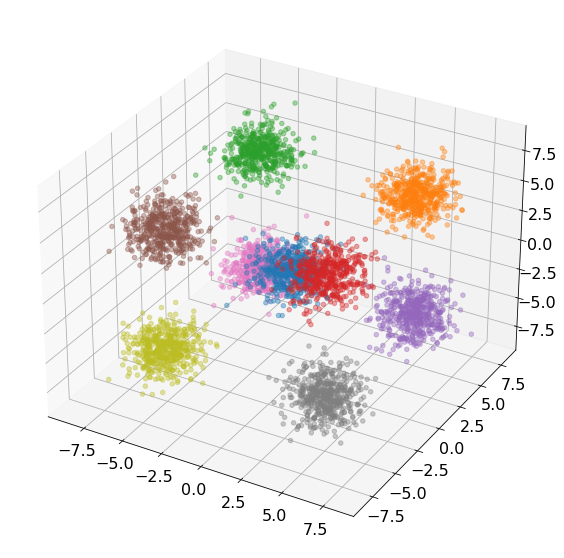

In [12]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

for i in range(9):
    xi, yi, zi = data[:500, i, 0], data[:500, i, 1], data[:500, i, 2]
    ax.scatter3D(xi, yi, zi, alpha=0.4);

In [13]:
distances = np.sqrt(np.sum(data**2, axis=2))
distances.shape

(1000000, 9)

In [16]:
inR = distances<10
data[inR].shape

(8128701, 3)

In [19]:
print(np.count_nonzero(inR, axis=1))

[6 9 8 ... 8 8 7]


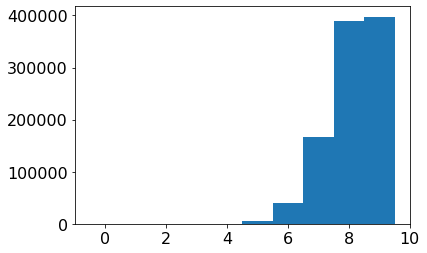

In [26]:
plt.hist(np.count_nonzero(inR, axis=1), bins=np.linspace(-0.5, 9.5, 11));

In [27]:
distances = np.sqrt(np.sum(data**2, axis=2))

def count_points(R):
    inR = distances<R
    return np.count_nonzero(inR)

In [35]:
fractions, Radius = [], np.linspace(0, 15, 100)
Ntot = data.size
for r in Radius:
    fractions.append(count_points(r))

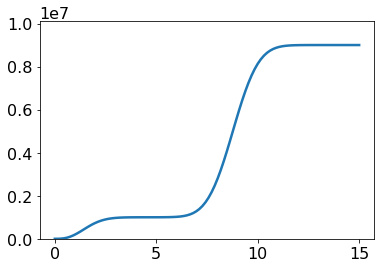

In [39]:
plt.plot(Radius, fractions)
plt.ylim(0, 10.1e6);